<img src="Databuds Banner.png">

# Who am I calling?

In this hands-on session, we will be using a public dataset - Bank Marketing data to run our analysis.
Read the instructions and fill in the answers in the accompanying form. Get all answers right and you stand a chance to win a prize (and honour and glory) in the next DataBuds!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# magic word for producing visualizations in notebook
%matplotlib inline

#Data Source: https://archive.ics.uci.edu/ml/datasets/bank+marketing

import random
random.seed(123)

### Step 0: Load the data

In [2]:
bankdata = pd.read_csv("bankmarketing.csv")

Note: If you are running this on Google colab, uncomment the lines below to load the dataset
Load the Databuds folder in your Google drive.
Run the following:

If the path (of bank data) does not work, you can call this code:

<font color ='orangered'>
*import os</br>
os.listdir()*</font>

to locate your files

In [3]:
#from google.colab import drive
#drive.mount('/content/drive/')
#bankdata = pd.read_csv("drive/MyDrive/DataBuds/bankmarketing.csv")

## Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]<br>

<br>
The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).<br>


###  Attribute Information:
### Input variables:
#### Bank client data:
1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>

#### Related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')<br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>

#### Other attributes
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>

#### Social and economic context attributes:
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric)<br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')<br>

### Objective of our Clustering analysis today

Before we want to identify potential customers who are likely to subscribe to a term deposit, let's start by seeing if we can come up with some customer profiles to work with. Clustering techniques are suitable for us to create customer profiles based on their data!

In [4]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).

print("Shape of data:",bankdata.shape)
bankdata.head()

Shape of data: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# <font color='royalblue'>Quiz 1:</font>

1. Which job forms 25% of the rows (admin)
2. How many clients have not been contacted for marketing purposes (39673)
3. True or False - Higher proportion customers with housing loan (housing = "yes") has subscribed to a term deposit (y = "yes"), as compared to customers without housing loan (True)

Answers:

In [5]:
bankdata.job.value_counts(normalize = True)
#bankdata.loan.value_counts() 

admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
student          0.021244
unknown          0.008012
Name: job, dtype: float64

In [6]:
bankdata[bankdata["pdays"]==999].shape

(39673, 21)

In [7]:
temp = pd.pivot_table(data = bankdata, index = "housing", columns = "y", values = "loan", aggfunc='count')#.reset_index()
temp["total"] = temp["no"]+temp["yes"]
temp["no"] = round(temp["no"]/temp["total"],3)
temp["yes"] = round(temp["yes"]/temp["total"],3)
temp

y,no,yes,total
housing,,,
no,0.891,0.109,18622
unknown,0.892,0.108,990
yes,0.884,0.116,21576


# Step 1: Preprocessing
### Question: 
How many columns are numeric and how many are categorical?

Answers:

In [8]:
# 10 numeric, 11 Cat
bankdata.info()

# Note, while we wish to separate out the categorical and the numerical columns, lets do some basic conversion of columns that are simpler

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### 1.1 
Drop industry level variables (we want to find out more about the customer. While industry level variables are also useful, we remove them for this analysis)

In [9]:
bankdata.drop(columns = ["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"], inplace = True)
bankdata.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Drop Month and Day variable. We could keep them if we think that customers respond differently on different periods. However, this dataset spans 3 years - while we have the Month and Day data, we do not have data on the Year. Hence, let's drop the variables

In [10]:
bankdata.drop(columns = ["month", "day_of_week"], inplace = True)
bankdata.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'],
      dtype='object')

### 1.2 Hot encode the following Variables:

In [11]:
# job - Top 3 categories + Others
def encode_var(row, col, ori_name, cat_name, others = "Others"):
    t = others
    for i in range(len(ori_name)):
        if(row[col]==ori_name[i]):
            t = cat_name[i]
    return t

bankdata["job_new"] = bankdata.apply(lambda x: encode_var(x, "job", ["admin.", "blue-collar", "services", "management"], ["Admin", "BC", "Svcs", "Mgmt"] ), axis = 1)
bankdata[["job","job_new"]].value_counts()

bankdata["marital_new"]=bankdata.apply(lambda x: encode_var(x, "marital", ["married", "single"], ["married", "single"] ), axis = 1)
bankdata[["marital","marital_new"]].value_counts()

bankdata["education_new"]=bankdata.apply(lambda x: encode_var(x, "education", ["university.degree", "professional.course", "high.school"], ["professional", "professional", "highschool"] ), axis = 1)
bankdata[["education","education_new"]].value_counts()

bankdata["contact_tel"]=bankdata.apply(lambda x: encode_var(x, "contact", ["telephone"], [1] , others = 0), axis = 1)
bankdata[["education","education_new"]].value_counts()

bankdata["poutcome"] = bankdata.apply(lambda x: encode_var(x, "poutcome", ['failure','nonexistent','success'],[0,0,1], 0), axis = 1)

### Exercise:
Using the above example, map the variables "default", "housing", "loan" and "y" to 1 and 0

In [12]:
#Answer
cat_yes = ["yes"]
cat_1 = [1]

bankdata["default"] = bankdata.apply(lambda x: encode_var(x, "default", cat_yes, cat_1, 0), axis = 1)
bankdata["housing"] = bankdata.apply(lambda x: encode_var(x, "housing", cat_yes, cat_1, 0), axis = 1)
bankdata["loan"] = bankdata.apply(lambda x: encode_var(x, "loan", cat_yes, cat_1, 0), axis = 1)
bankdata["y"] = bankdata.apply(lambda x: encode_var(x, "y", cat_yes, cat_1, 0), axis = 1)

In [13]:
# Drop old vars
col_drop = ["job", "marital", "education", "contact"]
bankdata.drop(columns = col_drop, inplace = True)
#bankdata.info()


In [14]:
bankdata.describe()

,age,default,housing,loan,duration,campaign,pdays,previous,poutcome,y,contact_tel
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,0.000073,0.523842,0.151695,258.285010,2.567593,962.475454,0.172963,0.033335,0.112654,0.365252
std,10.42125,0.008534,0.499437,0.358729,259.279249,2.770014,186.910907,0.494901,0.179512,0.316173,0.481507
min,17.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,0.000000,0.000000,0.000000,102.000000,1.000000,999.000000,0.000000,0.000000,0.000000,0.000000
50%,38.00000,0.000000,1.000000,0.000000,180.000000,2.000000,999.000000,0.000000,0.000000,0.000000,0.000000
75%,47.00000,0.000000,1.000000,0.000000,319.000000,3.000000,999.000000,0.000000,0.000000,0.000000,1.000000
max,98.00000,1.000000,1.000000,1.000000,4918.000000,56.000000,999.000000,7.000000,1.000000,1.000000,1.000000


In [15]:
# Hot encode categorical variables
bankdata = pd.get_dummies(bankdata)
bankdata.head()

,age,default,housing,loan,duration,campaign,pdays,previous,poutcome,y,...,job_new_BC,job_new_Mgmt,job_new_Others,job_new_Svcs,marital_new_Others,marital_new_married,marital_new_single,education_new_Others,education_new_highschool,education_new_professional
0,56,0,0,0,261,1,999,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,57,0,0,0,149,1,999,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,37,0,1,0,226,1,999,0,0,0,...,0,0,0,1,0,1,0,0,1,0
3,40,0,0,0,151,1,999,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,56,0,0,1,307,1,999,0,0,0,...,0,0,0,1,0,1,0,0,1,0


### Step 2: Understanding Data relationships

<AxesSubplot:>

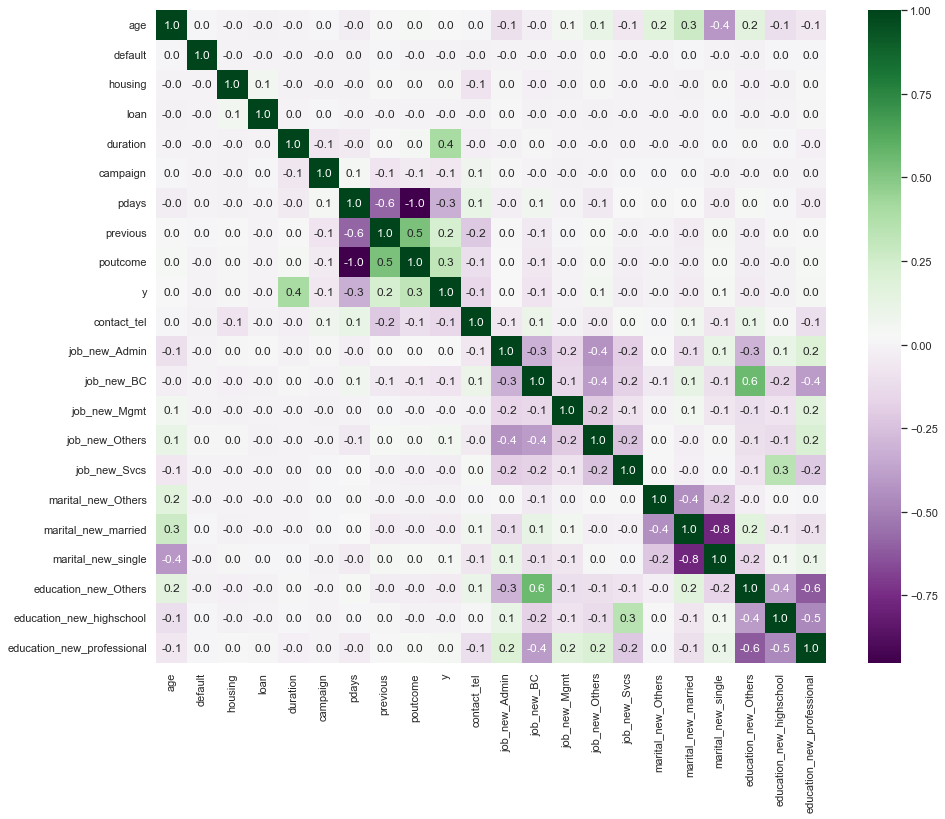

In [16]:
sns.set(rc={'figure.figsize':(15,12)})
sns.heatmap(bankdata.corr(),cmap = "PRGn", annot=True, fmt = "0.1f")
#bankdata.corr()

Since duration and y are reliant on each other, we remove duration now so that we do not work with data leakage if we choose to run a predictive model later

In [17]:
col_drop = ["duration"]
bankdata.drop(columns = col_drop, inplace = True)

### 2.1 Perform Scaling

### Question for thought: Is there a need to scale our data?
Yes and No. This depends on what you want to do later. Since we wish to run a clustering, we may likely want to perform dimensionality reduction in order to optimise the runtime (very important for large sets of data).

However, dimensionality reduction will fail if the data is not scaled, as we need to pick the number of Principal Components based on the variance explained by each PC (very vulnerable to scale of data)/

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
bankdata_fit = scaler.fit_transform(bankdata)

### 2.2 Dimension Reduction Through PCA

Dimension reduction is important in cluster analysis and creates a smaller data in volume and has the same analytical results as the original representation. A clustering process needs data reduction to obtain an efficient processing time while clustering and mitigate curse of dimensionality.

Since we have many variables to work with, we can look at dimensionality reduction techniques, through PCA. 
- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [19]:
from sklearn.decomposition import PCA
pca = PCA()
prin_com = pca.fit_transform(bankdata_fit)
pd.DataFrame(pca.explained_variance_ratio_).cumsum().head(10)
#(pd.DataFrame(pca.explained_variance_ratio_).cumsum().plot())

,0
0,0.134438
1,0.249413
2,0.341983
3,0.420561
4,0.488486
5,0.549953
6,0.603245
7,0.655528
8,0.704482
9,0.751997


# <font color='royalblue'>Quiz 2:</font>
### If I wish to retain 65% of the data variance, how many Principal Components should I retain? 
(Hint : remember to count PC_0)
(N = 8)

In [20]:
N=8 ## Fill in the value of N for which variance retained is at least 65%
pca = PCA(N)
prin_com = pca.fit_transform(bankdata_fit)
#pd.DataFrame(pca.explained_variance_ratio_).cumsum()

# <font color='royalblue'>Quiz 3:</font>
### What can I say about PC 7?
a) It has more Admin professions<br>
b) It has more Management professions<br>
c) Most of them have a housing loan<br>
Ans: B

Note: The larger the weight of the value, the more significant the variable (sign does not matter)

<AxesSubplot:>

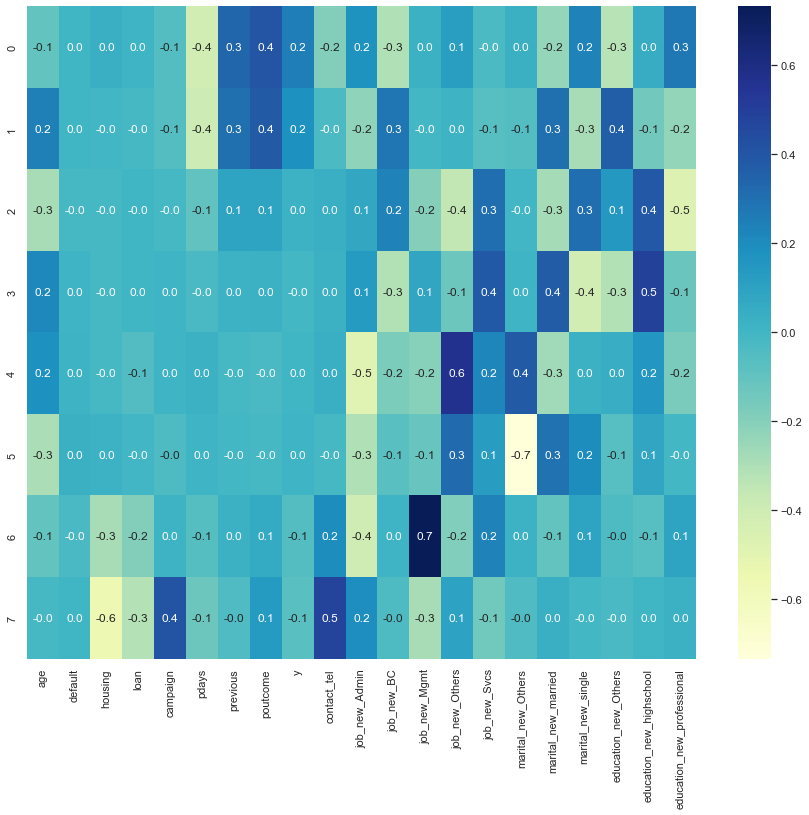

In [21]:
sns.heatmap(pd.DataFrame(pca.components_, columns = bankdata.columns), annot = True,fmt = "0.1f", cmap = 'YlGnBu')

## Step 3: Clustering

### Step 3.1: Apply Clustering to the full dataset

You've assessed and cleaned the  data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Compute the score of the model **Hint**: The KMeans object's `.score()` method might be useful here.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. <br>
**Warning**: depending size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture. Ultimately, we need to know our business needs to know how many clusters we are aiming for, and having too many clusters might hinder our understanding
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation.

In [22]:
from sklearn.cluster import KMeans
# Over a number of different cluster counts...
scores = []
centers = list(range(1,10,1))

    # run k-means clustering on the data and...
for c in centers:
    #print("Running Model for",c,"clusters")
    model_k = KMeans(n_clusters=c)
    model_k.fit(prin_com)
    # compute the average within-cluster distances.
    score = np.abs(model_k.score(prin_com))
    scores.append(score)

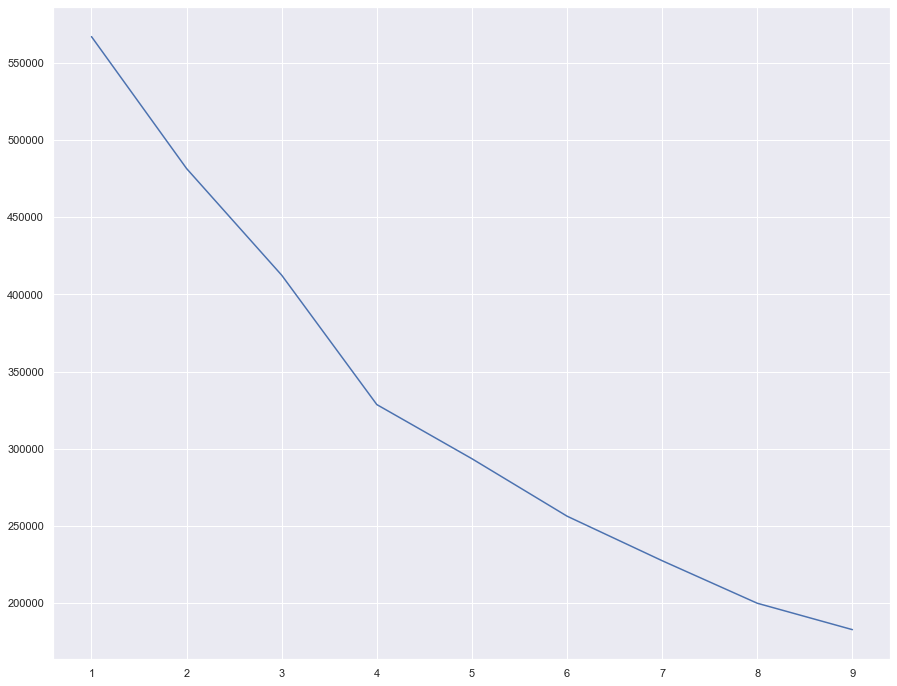

In [23]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.
plt.plot(centers, scores)
plt.xticks(range(1,10))
plt.show()

In [24]:
n_clust = 4
kmeans = KMeans(n_clusters = n_clust)
kmeans.fit(prin_com)
pred = kmeans.predict(prin_com)

## Step 4: Making sense of your clusters

### 1st way: Reversing the scaling and PC of your data to study the Centroids of each cluster

In [25]:
centroid_0 = scaler.inverse_transform(pca.inverse_transform(kmeans.cluster_centers_[0]))
over_c = pd.Series(data = centroid_0, index = bankdata.columns)
over_c

age                            42.376676
default                        -0.000035
housing                         0.520239
loan                            0.150784
campaign                        2.574643
pdays                         994.147638
previous                        0.097999
poutcome                        0.003987
y                               0.066712
contact_tel                     0.465759
job_new_Admin                   0.030907
job_new_BC                      0.674750
job_new_Mgmt                    0.014416
job_new_Others                  0.270906
job_new_Svcs                    0.009021
marital_new_Others              0.106154
marital_new_married             0.748310
marital_new_single              0.145535
education_new_Others            0.912653
education_new_highschool        0.011259
education_new_professional      0.076089
dtype: float64

### 2nd Way: Call out the mean of a groupby("Pred") object 
(a lot easier! I would prefer this because it's straightforward)<br>
Recap: We assigned the cluster numbers to the variable "Pred"

In [26]:
bankdata["pred"] = pred
bankdata.groupby("pred").mean()

,age,default,housing,loan,campaign,pdays,previous,poutcome,y,contact_tel,...,job_new_BC,job_new_Mgmt,job_new_Others,job_new_Svcs,marital_new_Others,marital_new_married,marital_new_single,education_new_Others,education_new_highschool,education_new_professional
pred,,,,,,,,,,,,,,,,,,,,,
0,42.483542,0.000000,0.507625,0.144949,2.586064,999.000000,0.106749,0.000000,0.074438,0.452514,...,0.614601,0.032916,0.286200,0.002265,0.096859,0.744904,0.158236,0.969123,0.003548,0.027329
1,37.980702,0.000096,0.520069,0.151872,2.592628,998.904477,0.130548,0.000000,0.088769,0.388364,...,0.077866,0.028464,0.212756,0.372829,0.130838,0.546990,0.322173,0.082015,0.881609,0.036376
2,39.139370,0.000125,0.537053,0.157242,2.606614,999.000000,0.113028,0.000000,0.109852,0.305829,...,0.011023,0.129842,0.490970,0.000000,0.118757,0.535060,0.346183,0.010649,0.000000,0.989351
3,41.869737,0.000000,0.551316,0.150658,1.823684,9.932237,1.672368,0.903289,0.638158,0.075000,...,0.084868,0.071053,0.486184,0.049342,0.096053,0.526316,0.377632,0.265789,0.217763,0.516447


# <font color='royalblue'>Quiz 4:</font>
### Which of these statements are likely true?
a) cluster 0 has the oldest customers</br>
b) cluster 1 comprises the most customers who were recently contacted</br>
c) cluster 1 has had the most defaults previously</br>
d) cluster 1 has a higher proportion of married customers</br>
Answer: (d)

# The end!!

This sums up the gist of how you would run an unsupervised clustering from start to end! While the steps taken can be pretty standard, it is improtant to understand your business context and data points before making decisions on how to manipulate the data!

Feel free to substitute the scaling, dimensionality reduction, and clustering model with different methods to see how your data changes!

## What... next?
Notice that in the dataset, a variable "y" exists. This variable tells us if a client subscribes to a term deposit. We could possibly build a **classification model**, if we wish to predict which customers are more likely to subscribe to a term deposit (and hence, spend our time calling them


In [27]:
## An Implementation of DBScan
from sklearn.cluster import DBSCAN  

db_cluster = DBSCAN(eps = 0.5, min_samples = 3).fit(prin_com)
pred = db_cluster.labels_

In [28]:
## An Implementation of Gaussian Mixed Models
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5)
gmm_pred = gmm.fit_predict(prin_com)

## If you want the probabilities of each data point belonging to the cluster, you can do this:
# gmm_predict_proba = gmm.fit_predict_proba(prin_com)